# Weather Station Data processing and Visualization 

The data saved into the `SDcard` is a `.csv` file with time information from the RTC (Real Time Clock) and the atmospheric variables collected from the `BME280` sensor.

In [ ]:
# Download a data file from github, if it doesn't exist
!test ! -f envphys200.py && wget 'https://raw.githubusercontent.com/edur409/ENVPHYS/refs/heads/main/Weather_Stations/envphys200.py'
# Stations
!test ! -f Moana.csv && wget 'https://raw.githubusercontent.com/edur409/ENVPHYS/refs/heads/main/Weather_Stations/Moana.csv'
!test ! -f Tiana.csv && wget 'https://raw.githubusercontent.com/edur409/ENVPHYS/refs/heads/main/Weather_Stations/Tiana.csv'
!test ! -f Merida.csv && wget 'https://raw.githubusercontent.com/edur409/ENVPHYS/refs/heads/main/Weather_Stations/Merida.csv'
!test ! -f Mulan.csv && wget 'https://raw.githubusercontent.com/edur409/ENVPHYS/refs/heads/main/Weather_Stations/Mulan.csv'
!test ! -f Pocahontas.csv && wget 'https://raw.githubusercontent.com/edur409/ENVPHYS/refs/heads/main/Weather_Stations/Pocahontas.csv'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from envphys200 import RH_Dew_point, dew_point, Wet_bulb_temp

In [2]:
filename = 'Moana.csv'
DF = pd.read_csv(filename, parse_dates=[' Epoch Time']).dropna()
DF[' Epoch Time'] = pd.to_datetime(DF[' Epoch Time'], format = ' %d/%m/%Y %H:%M:%S')

In [3]:
DF.describe()

,Epoch Time,Temp0,Temp1,Temp2,Temp3,Temp4,Humidity,Press0,Press1,Press2,Press3,Press4,Voltage
count,2876,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000,2876.000000
mean,2024-10-12 13:06:30.168289536,17.785688,17.785688,17.785688,17.785688,17.785602,57.139593,1011.490515,1011.490515,1011.490515,1011.490515,1011.490522,4.038971
min,2024-10-07 13:15:00,10.050000,10.050000,10.050000,10.050000,10.050000,19.790000,1002.220000,1002.220000,1002.220000,1002.220000,1002.240000,2.980000
25%,2024-10-10 01:13:45,13.857500,13.857500,13.857500,13.857500,13.860000,47.100000,1006.990000,1006.990000,1006.990000,1006.990000,1007.010000,3.780000
50%,2024-10-12 13:07:30,18.755000,18.755000,18.755000,18.755000,18.750000,55.130000,1011.155000,1011.155000,1011.155000,1011.155000,1011.155000,3.860000
75%,2024-10-15 01:01:15,21.202500,21.202500,21.202500,21.202500,21.200000,68.750000,1014.072500,1014.072500,1014.072500,1014.072500,1014.070000,4.020000
max,2024-10-17 12:55:00,39.370000,39.370000,39.370000,39.370000,39.490000,76.470000,1029.260000,1029.260000,1029.260000,1029.260000,1029.350000,4.890000
std,NaN,4.175280,4.175280,4.175280,4.175280,4.175368,11.351163,5.224547,5.224547,5.224547,5.224547,5.223975,0.395209


In [4]:
time = DF[' Epoch Time']
T_mean = 0.2*(DF[' Temp0'] + DF[' Temp1'] + DF[' Temp2'] + DF[' Temp3'] + DF[' Temp4'])
P_mean = 0.2*(DF[' Press0'] + DF[' Press1'] + DF[' Press2'] + DF[' Press3'] + DF[' Press4'])
RH_mean = DF[' Humidity']
RH_std = 0
T_std = np.std(np.c_[DF[' Temp0'], DF[' Temp1'], DF[' Temp2'], DF[' Temp3'], DF[' Temp4']], axis=1)
P_std = np.std(np.c_[DF[' Press0'], DF[' Press1'], DF[' Press2'], DF[' Press3'], DF[' Press4']], axis=1)

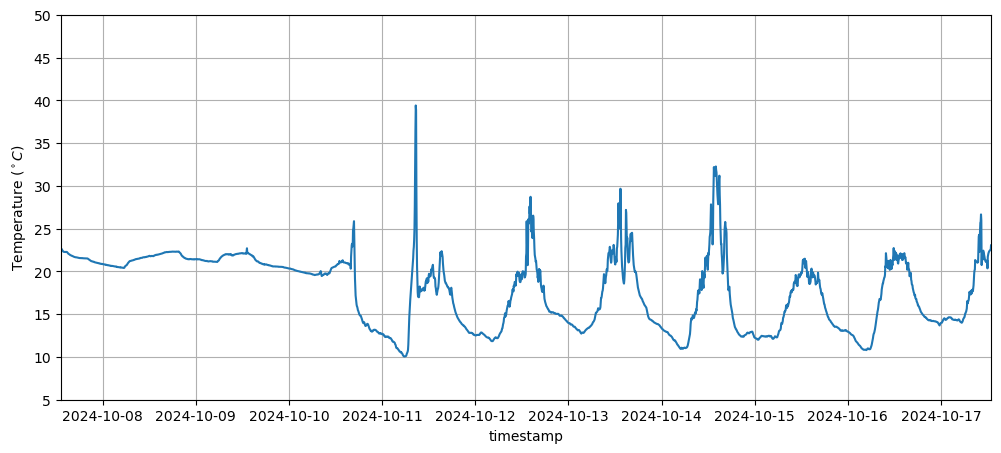

In [5]:
plt.figure(figsize = (12,5))
plt.plot(DF[' Epoch Time'], T_mean)
plt.axis([DF[' Epoch Time'].min(), DF[' Epoch Time'].max(), 5, 50])
plt.xlabel('timestamp')
plt.ylabel(r'Temperature ($^\circ C$)')
plt.grid(True)

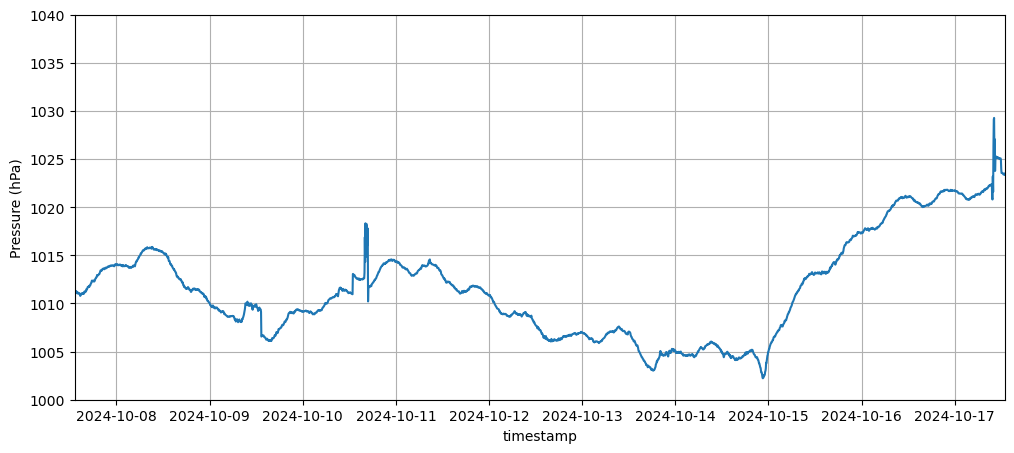

In [6]:
plt.figure(figsize = (12,5))
plt.plot(DF[' Epoch Time'], P_mean)
plt.xlabel('timestamp')
plt.ylabel('Pressure (hPa)')
plt.axis([DF[' Epoch Time'].min(), DF[' Epoch Time'].max(), 1000, 1040])
plt.grid(True)

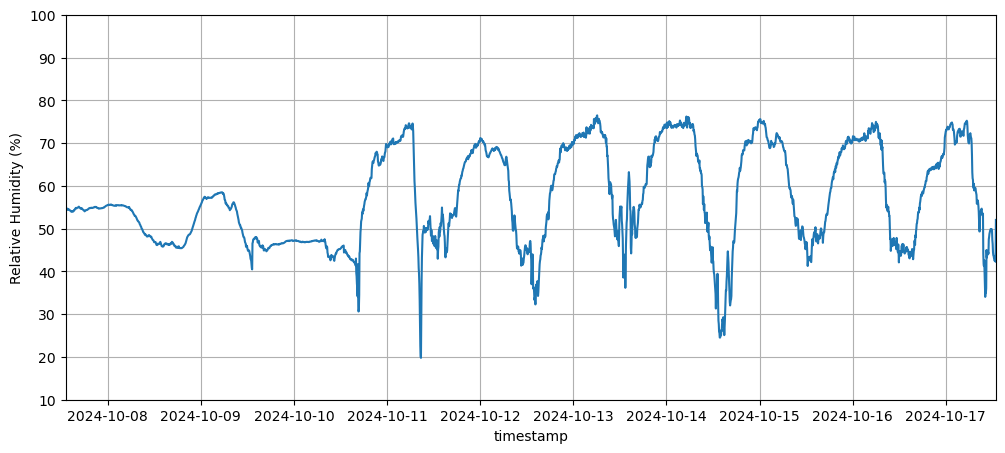

In [7]:
plt.figure(figsize = (12,5))
plt.plot(DF[' Epoch Time'], RH_mean)
plt.axis([DF[' Epoch Time'].min(), DF[' Epoch Time'].max(), 10, 100])
plt.xlabel('timestamp')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)

C:\Users\edur409\AppData\Local\Temp\ipykernel_1384\3392680586.py:61: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate()


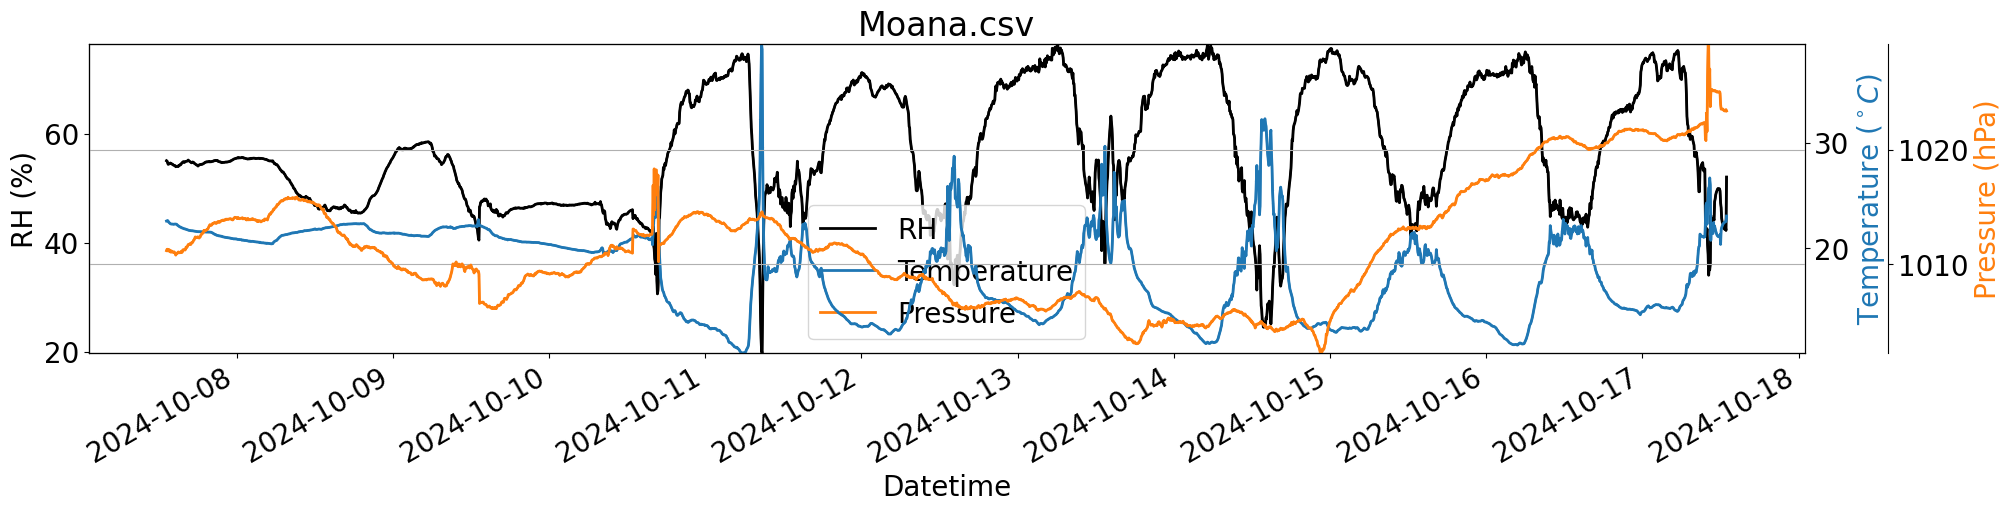

In [8]:
plt.rcParams['font.size'] = 20
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(20,5), layout='constrained') # (width, height) in inches
# (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
# .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)
    
ax2 = host.twinx()
ax3 = host.twinx()
    
#host.set_xlim(time[0], time[-1])
host.set_ylim(np.min(RH_mean),np.max(RH_mean))
ax2.set_ylim(np.min(T_mean),np.max(T_mean))
ax3.set_ylim(np.min(P_mean),np.max(P_mean))
    
host.set_xlabel("Datetime")
host.set_ylabel("RH (%)")
ax2.set_ylabel(r"Temperature ($^\circ C$)")
ax3.set_ylabel("Pressure (hPa)")

color1, color2, color3 = ['k', 'tab:blue', 'tab:orange']#plt.cm.rainbow([0, .5, .9])

p1 = host.plot(time, RH_mean, lw = 2,   color=color1, label="RH")
host.errorbar(time, RH_mean, yerr=RH_std, label = 'Std', color = color1)
p2 = ax2.plot( time, T_mean, lw = 2,   color=color2, label="Temperature")
ax2.errorbar(time, T_mean, yerr=T_std, label = 'Std', color = color2)
p3 = ax3.plot( time, P_mean, lw = 2, color=color3, label="Pressure")
ax3.errorbar(time, P_mean, yerr=P_std, label = 'Std', color = color3)

host.legend(handles=p1+p2+p3, loc='best')

# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))

# no x-ticks                 
# host.xaxis.set_ticks([])

# Alternatively (more verbose):
# host.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off)
#     labelbottom=False) # labels along the bottom edge are off
# sometimes handy:  direction='in'    

# #Move "Pressure"-axis to the left
# ax3.spines['left'].set_position(('outward', 60))
# ax3.spines['left'].set_visible(True)
# ax3.spines['right'].set_visible(False)
# ax3.yaxis.set_label_position('left')
# ax3.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
ax3.yaxis.label.set_color(p3[0].get_color())
plt.grid(True)
plt.title(''+filename+'')
fig.autofmt_xdate()
# For professional typesetting, e.g. LaTeX, use .pgf or .pdf
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=300)'
plt.savefig('PTRH_fullrange_'+filename+'.pdf', bbox_inches='tight')
# bbox_inches='tight': Try to strip excess whitespace
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

C:\Users\edur409\AppData\Local\Temp\ipykernel_1384\3804924760.py:63: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.autofmt_xdate()


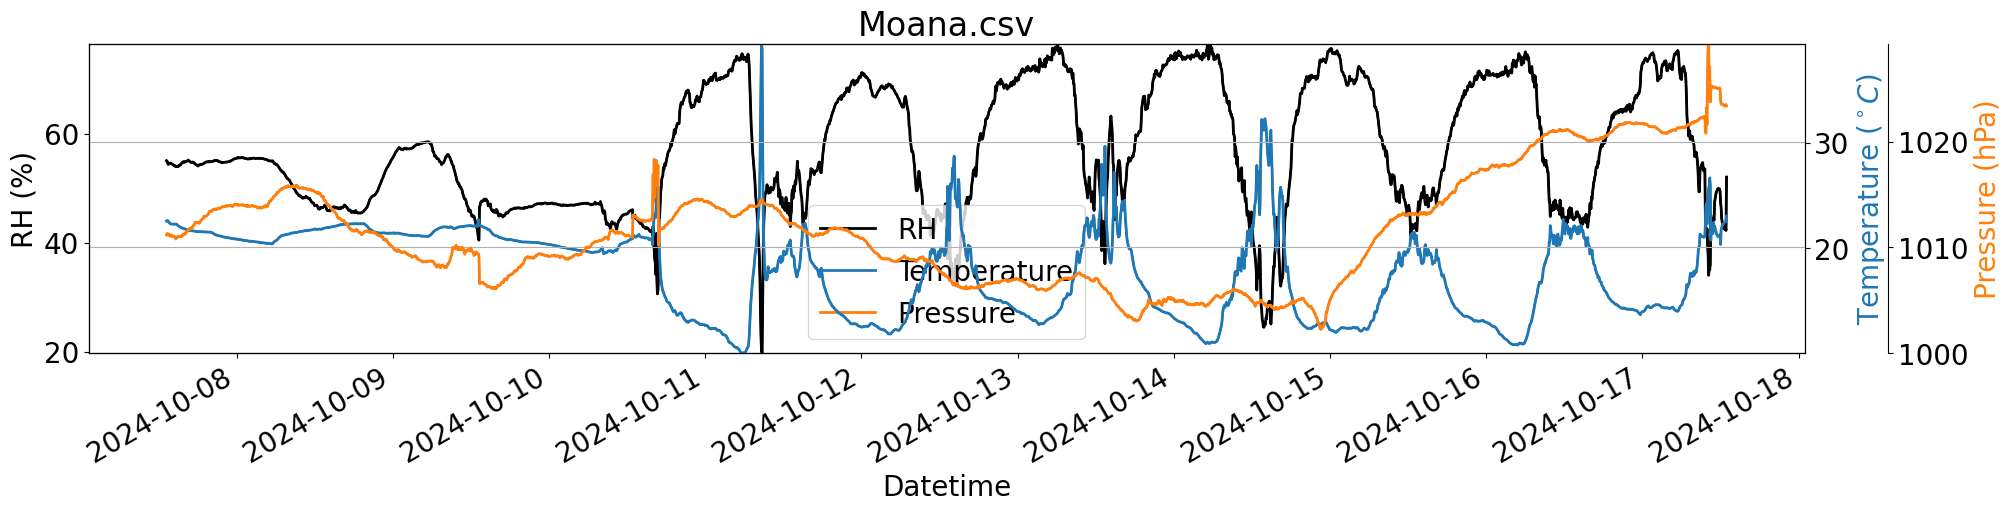

In [9]:
plt.rcParams['font.size'] = 20
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(20,5), layout='constrained') # (width, height) in inches
# (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
# .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)
    
ax2 = host.twinx()
ax3 = host.twinx()
    
#host.set_xlim(time[0], time[-1])
host.set_ylim(np.min(RH_mean),np.max(RH_mean))
ax2.set_ylim(np.min(T_mean),np.max(T_mean))
ax3.set_ylim(1000,np.max(P_mean))
    
host.set_xlabel("Datetime")
host.set_ylabel("RH (%)")
ax2.set_ylabel(r"Temperature ($^\circ C$)")
ax3.set_ylabel("Pressure (hPa)")

color1, color2, color3 = ['k', 'tab:blue', 'tab:orange']#plt.cm.rainbow([0, .5, .9])

p1 = host.plot(time, RH_mean, lw = 2,   color=color1, label="RH")
host.errorbar(time, RH_mean, yerr=RH_std, label = 'Std', color = color1)
p2 = ax2.plot( time, T_mean, lw = 2,   color=color2, label="Temperature")
ax2.errorbar(time, T_mean, yerr=T_std, label = 'Std', color = color2)
p3 = ax3.plot( time, P_mean, lw = 2, color=color3, label="Pressure")
ax3.errorbar(time, P_mean, yerr=P_std, label = 'Std', color = color3)

host.legend(handles=p1+p2+p3, loc='best')

# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))

# no x-ticks                 
# host.xaxis.set_ticks([])

# Alternatively (more verbose):
# host.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off)
#     labelbottom=False) # labels along the bottom edge are off
# sometimes handy:  direction='in'    

# #Move "Pressure"-axis to the left
# ax3.spines['left'].set_position(('outward', 60))
# ax3.spines['left'].set_visible(True)
# ax3.spines['right'].set_visible(False)
# ax3.yaxis.set_label_position('left')
# ax3.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
ax3.yaxis.label.set_color(p3[0].get_color())
plt.grid(True)
# For professional typesetting, e.g. LaTeX, use .pgf or .pdf
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=300)'
plt.title(''+filename+'')
fig.autofmt_xdate()
plt.savefig('PTRH_'+filename+'.pdf', bbox_inches='tight')
# bbox_inches='tight': Try to strip excess whitespace
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

# Calculate the dew point

The dew point is the temperature that the air or a surface has to be lowered to so that condensation can happen. Lowering the temperature of air increases the relative humidity, hence at 100% relative humidity, water vapor in the air can turn from gas to liquid.  

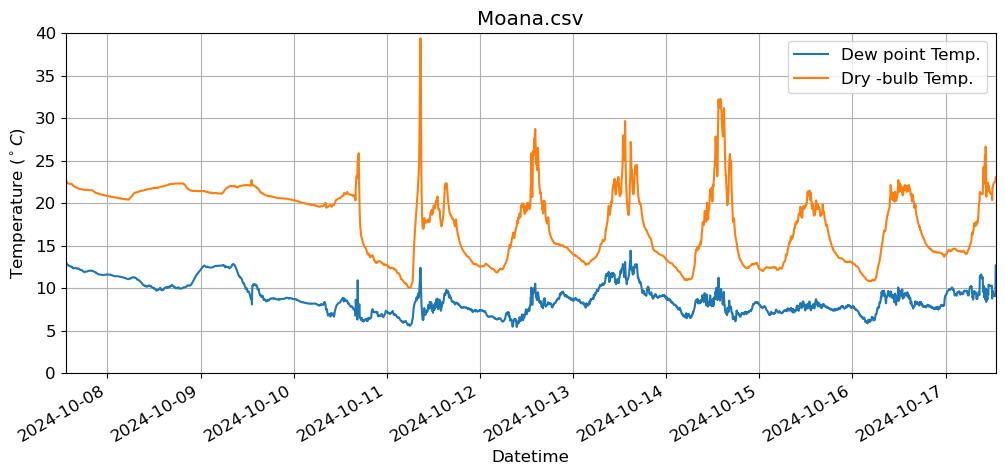

In [10]:
T_dp = dew_point(T_mean, RH_mean)

plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(time, T_dp, label = 'Dew point Temp.')
ax.plot(time, T_mean, label = 'Dry -bulb Temp.')
ax.set_xlabel("Datetime")
ax.set_ylabel(r"Temperature ($^\circ C$)")
plt.axis([time.min(), time.max(), 0, 40])
plt.grid(True)
plt.legend()
plt.title(''+filename+'')
fig.autofmt_xdate()
plt.savefig('DewPoint_DryBulb_'+filename+'.pdf', bbox_inches='tight')

# Dry-bulb and Wet-bulb temperatures

The temperature sensation is directly related to the wet-bulb temperature.  Remember that the wet-bulb temperature is the minimum temperature that can be reached by evaporative cooling; therefore, its relevance when discussing the combined effects of temperature and relative humidity on human activities.

In [11]:
Twb_mean = Wet_bulb_temp(T_mean, RH_mean)

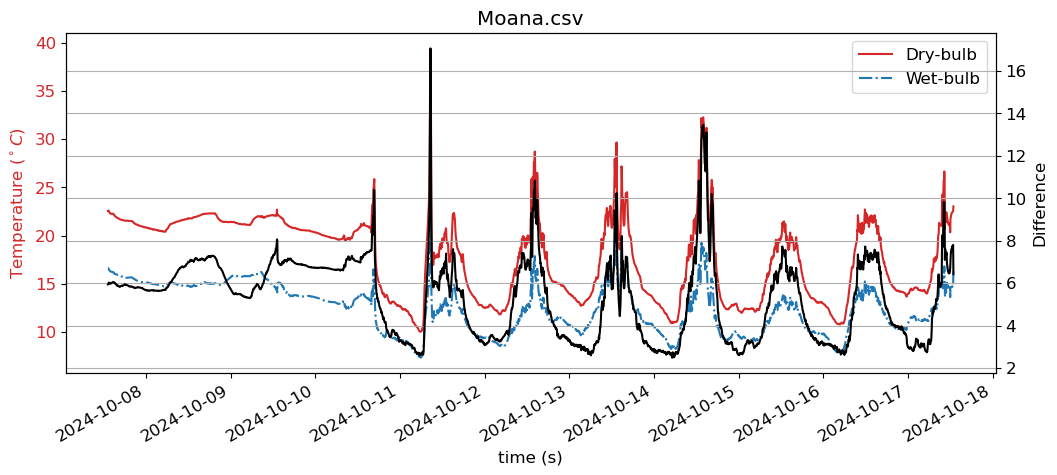

<Figure size 640x480 with 0 Axes>

In [14]:
fig2, ax1 = plt.subplots(figsize = (12,5))

color = 'tab:red'
color2 = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Temperature ($^\circ C$)', color=color)
ax1.plot(time, T_mean, color=color, label = 'Dry-bulb')
ax1.plot(time, Twb_mean, ls='-.',color=color2, label = 'Wet-bulb')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'k'
ax2.set_ylabel('Difference', color=color)  # we already handled the x-label with ax1
ax2.plot(time, np.array(T_mean) - np.array(Twb_mean), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
ax1.legend()
fig2.autofmt_xdate()
plt.title(''+filename+'')
plt.show()
plt.savefig('DryBulb_WetBulb_'+filename+'.pdf', bbox_inches='tight')